# Question 2 : Analysis 3
- Aim of this analysis was to find the no of different article topics and their count for the month of march 2017.

In [1]:
import requests,json,os
import re,datetime
import shutil
import matplotlib.pyplot as mp
nyt_article_search_key = os.getenv('auth_key')


In [3]:
dir_path='Article Search'     #Relative path
os.makedirs(dir_path,exist_ok=True)

In [ ]:
for m in range(1,118):   #Extacting Article search data for multiple pages.
    art_url=('http://api.nytimes.com/svc/search/v2/articlesearch.json?page='+str(m)+'&sort=newest&api-key='+ nyt_article_search_key)
    get_request=requests.get(art_url)
    try:
        art=json.loads(get_request.text)
    except JSONDecodeError:
            pass
    for i in range(0,10):
        try:
            with open(art['response']['docs'][i]['_id'],'w')as outfile: #Opening and storing the individual article to the folder.
                json.dump(art['response']['docs'][i],outfile)
        except KeyError:
            pass
    for files in os.listdir('./'):        
        if os.path.isdir(files) == False:
            if not files.endswith('.ipynb'):
                try:
                    shutil.move(os.path.join('./',files),os.path.join(dir_path,files+'.json'))  #moving the newey created folder to the desired location with .json extension.
                except OSError:
                    pass

In [9]:
jpath ='Article Search/'
sec={}         #Created a dictionary for counting the no articles for each topic.

files=[j for j in os.listdir(jpath)]  
for f in files:
    if f.endswith('.json'):
        if not f.startswith('.'):
            with open(os.path.join(jpath,f), 'r', encoding='utf-8', errors="ignore") as json_file:
                
                artdata=json.load(json_file)
                      
                match = re.search(r'\d{4}-\d{2}-\d{2}', artdata['pub_date'])
                date = datetime.datetime.strptime(match.group(), '%Y-%m-%d').date()
                try:
                    if artdata['section_name'] not in sec:
                        sec[artdata['section_name']]=1        
                    else:                                 #Count for each topic was added to the corresponding key.
                        sec[artdata['section_name']]+=1
                except (IndexError,KeyError):
                    pass

In [8]:
for x in sorted(sec, key=sec.get, reverse=True):
    print(x,sec[x])

World 329
Sports 259
U.S. 221
Business Day 129
Opinion 35
Arts 29
Fashion & Style 27
N.Y. / Region 13
Technology 13
Food 9
The Learning Network 5
Crosswords & Games 4
Books 4
T Magazine 4
Briefing 3
Real Estate 3
Theater 3
Well 2
The Upshot 2
Movies 2
Science 2
Corrections 2
Today’s Paper 1
Podcasts 1
Blogs 1
Multimedia/Photos 1
Your Money 1
Public Editor 1
Admin 1
Times Insider 1


In [6]:
topic=[]           # Created lists for X-axis and Y-axis values.
topic_count=[]
for a in sec:
    topic.append(a)
    topic_count.append(sec[a])

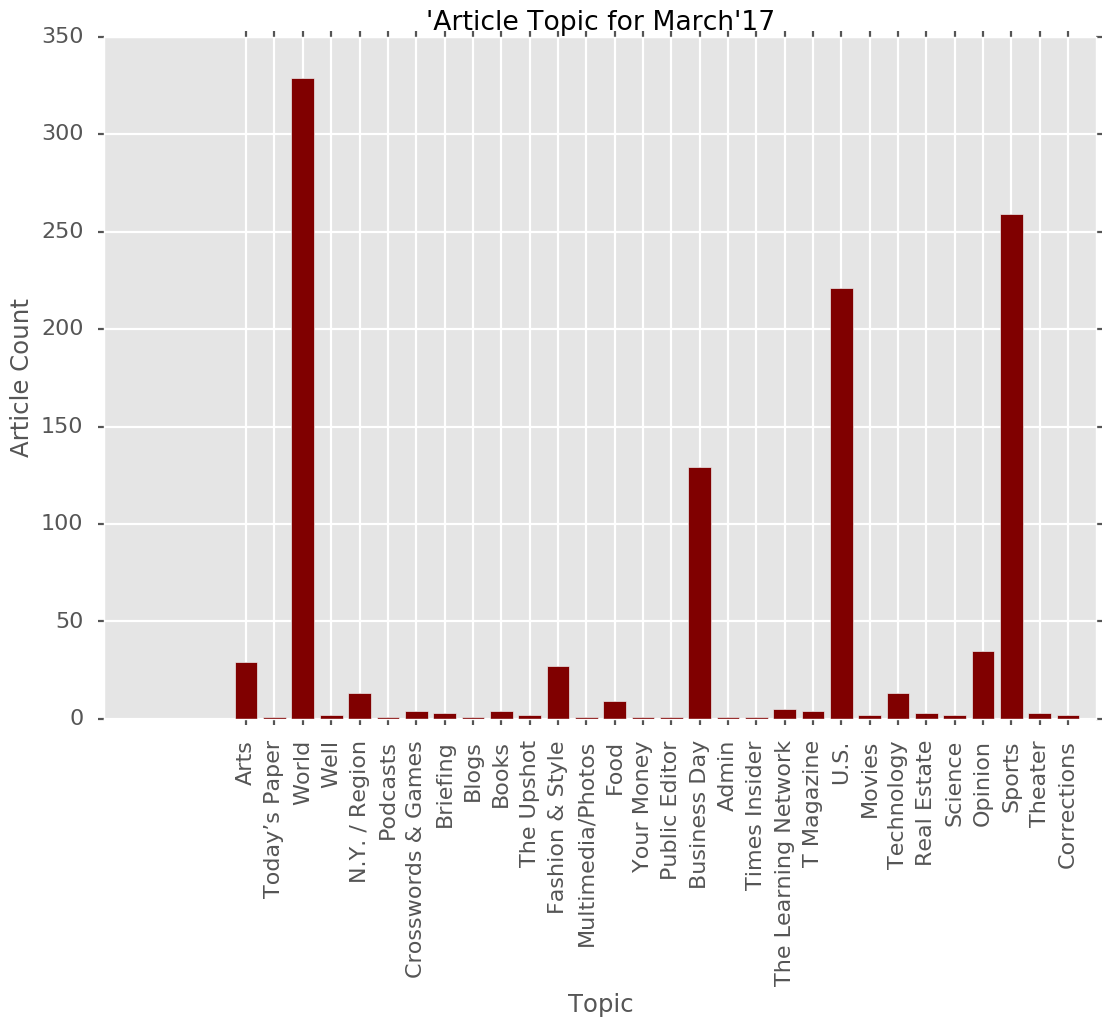

In [10]:
mp.style.use('ggplot')
mp.style.use('seaborn-dark-palette')
mp.style.use('seaborn-poster')


mp.bar(range(len(topic)),topic_count,color='maroon',align='center')
mp.xticks(range(len(topic)),topic,rotation=90)
mp.title("'Article Topic for March'17")
mp.ylabel('Article Count')
mp.xlabel('Topic')

mp.show()